In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("combined.csv")
df.head()

,latitude,longitude,block_no,street_name_x,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name_y,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2015-01,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,04 TO 06,74.0,Improved,1979,388000.0,63,54
1,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2016-03,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,350000.0,62,54
2,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-04,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,340000.0,61 years 05 months,54
3,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-05,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,322000.0,61 years 05 months,54
4,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-06,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,370000.0,61 years 03 months,54


In [3]:
df.shape

(223955, 20)

In [4]:
df.isna().sum()

latitude               0
longitude              0
block_no               0
street_name_x          0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name_y          0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
lease_remain_years     0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [5]:
df["storey_range"][0]
storey = np.median([float(i) for i in df["storey_range"][0].split(' TO ')])
storey


np.float64(5.0)

In [3]:
df["storey_median"] = df["storey_range"].apply(lambda i:np.median([float(j) for j in i.split(' TO ')]))

In [7]:
df["flat_type"].value_counts()

flat_type
4 ROOM              93992
5 ROOM              55045
3 ROOM              54339
EXECUTIVE           16675
2 ROOM               3738
MULTI-GENERATION       84
1 ROOM                 82
Name: count, dtype: int64

In [8]:
df["flat_model"].nunique()

21

In [9]:
df["flat_model"].value_counts()

flat_model
Model A                   76485
Improved                  55387
New Generation            29506
Premium Apartment         24578
Simplified                 9056
Apartment                  8363
Maisonette                 6323
Standard                   6266
DBSS                       3296
Model A2                   2722
Type S1                     443
Model A-Maisonette          403
Adjoined flat               379
Type S2                     219
Terrace                     124
2-room                      122
Premium Apartment Loft      113
Multi Generation             84
3Gen                         39
Improved-Maisonette          31
Premium Maisonette           16
Name: count, dtype: int64

In [4]:
scope_df = df[['cbd_dist','min_dist_mrt','flat_type','flat_model','floor_area_sqm','lease_remain_years','storey_median','resale_price']]
scope_df

,cbd_dist,min_dist_mrt,flat_type,flat_model,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,2715.822202,457.092359,3 ROOM,Improved,74.0,54,5.0,388000.0
1,2715.822202,457.092359,3 ROOM,Improved,68.0,54,8.0,350000.0
2,2715.822202,457.092359,3 ROOM,Improved,68.0,54,8.0,340000.0
3,2715.822202,457.092359,3 ROOM,Improved,68.0,54,8.0,322000.0
4,2715.822202,457.092359,3 ROOM,Improved,68.0,54,8.0,370000.0
...,...,...,...,...,...,...,...,...
223950,2525.251132,182.864524,5 ROOM,Improved,112.0,91,23.0,1325000.0
223951,2525.251132,182.864524,5 ROOM,Improved,112.0,91,20.0,1400000.0
223952,2525.251132,182.864524,4 ROOM,Model A,92.0,91,26.0,1188000.0
223953,2525.251132,182.864524,5 ROOM,Improved,112.0,91,35.0,1588000.0


In [11]:
scope_df.duplicated().sum()

np.int64(6455)

In [5]:
scope_df = scope_df.drop_duplicates()

In [17]:
scope_df.duplicated().sum()

np.int64(0)

In [13]:
scope_df.shape

(217500, 8)

In [14]:
scope_df.columns

Index(['cbd_dist', 'min_dist_mrt', 'flat_type', 'flat_model', 'floor_area_sqm',
       'lease_remain_years', 'storey_median', 'resale_price'],
      dtype='object')

In [6]:
df1 = scope_df.copy()

# SKEWNESS

cbd_dist : -0.5327332649683651


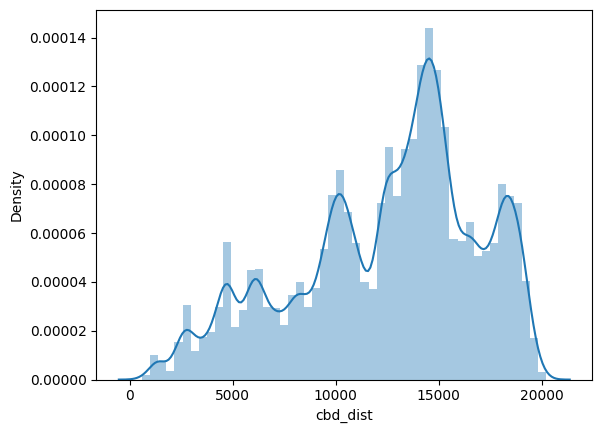

min_dist_mrt : 1.0521378529603636


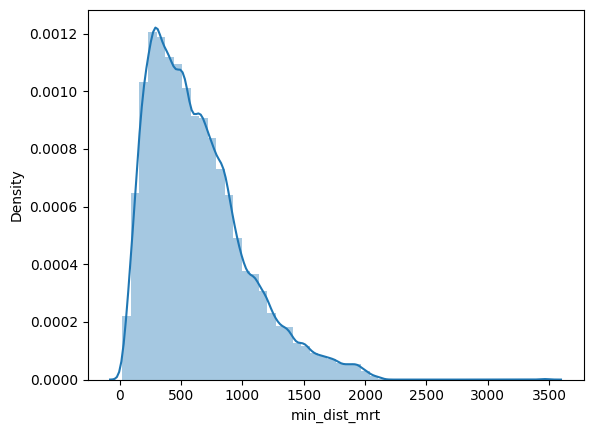

floor_area_sqm : 0.26643260778543665


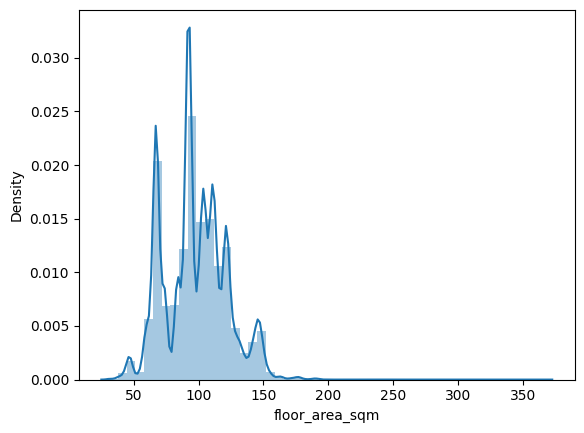

lease_remain_years : 0.13079894524590735


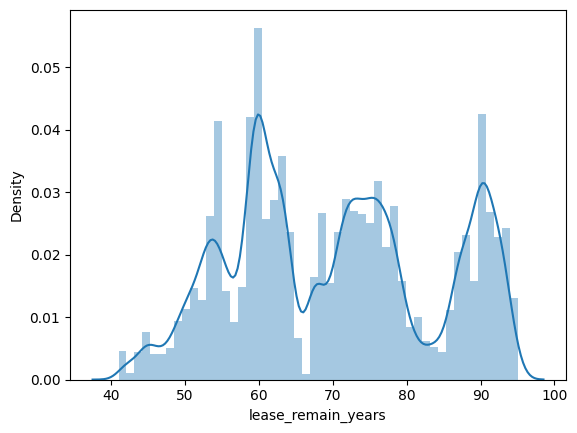

storey_median : 1.615441079362014


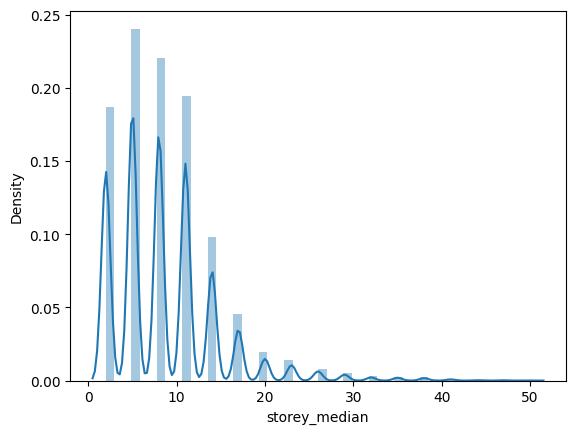

resale_price : 1.0079302290491257


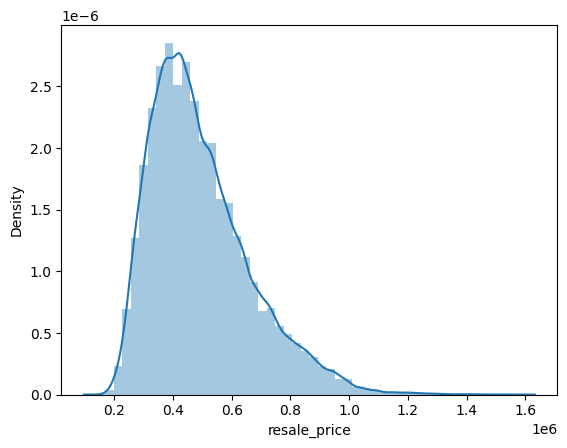

In [7]:
x = ['cbd_dist', 'min_dist_mrt','floor_area_sqm','lease_remain_years', 'storey_median', 'resale_price']
for i in x:
    print(i,":",df1[i].skew())
    sns.distplot(df1[i])
    plt.show()
    

In [8]:
x = ['cbd_dist', 'min_dist_mrt','floor_area_sqm','lease_remain_years', 'storey_median', 'resale_price']
for i in x:
    print(i,":",df1[i].skew())

cbd_dist : -0.5327332649683651
min_dist_mrt : 1.0521378529603636
floor_area_sqm : 0.26643260778543665
lease_remain_years : 0.13079894524590735
storey_median : 1.615441079362014
resale_price : 1.0079302290491257


In [9]:
x = ['cbd_dist', 'min_dist_mrt','floor_area_sqm','lease_remain_years', 'storey_median', 'resale_price']
for i in x:
    print(i,":",np.mean(df1[i]),np.median(df1[i]))

cbd_dist : 12453.556283825763 13369.687072730962
min_dist_mrt : 632.3571928315183 554.344964886835
floor_area_sqm : 97.37378436781609 94.0
lease_remain_years : 70.27214252873563 70.0
storey_median : 8.670041379310344 8.0
resale_price : 492958.01277521846 460000.0


In [7]:
df1['min_dist_mrt'] = df1['min_dist_mrt'].apply(lambda x:x if x>0 else np.nan)

In [11]:
df1.isna().sum()

cbd_dist              0
min_dist_mrt          0
flat_type             0
flat_model            0
floor_area_sqm        0
lease_remain_years    0
storey_median         0
resale_price          0
dtype: int64

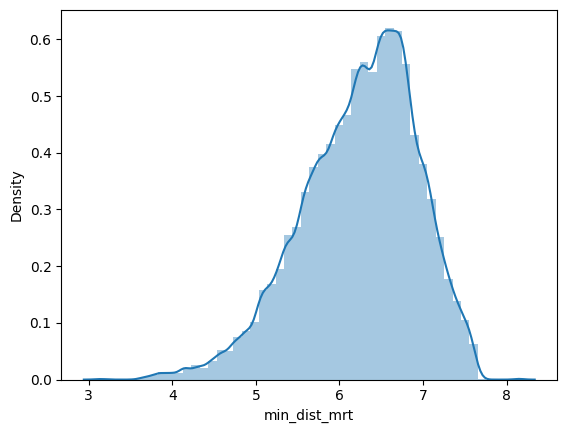

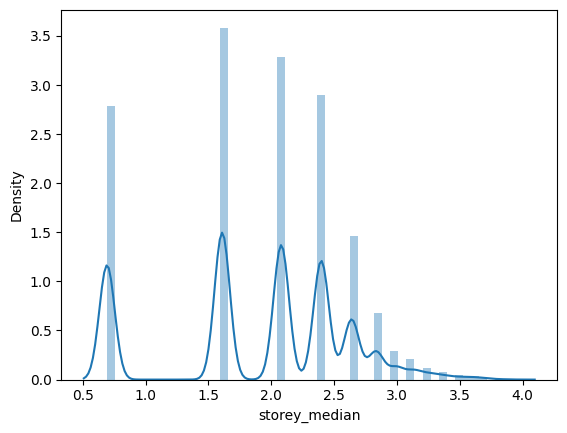

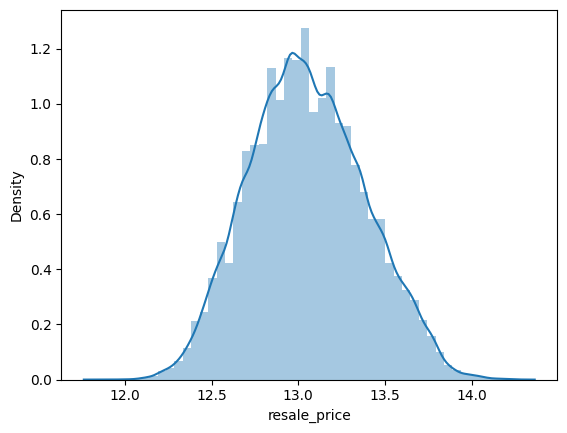

In [8]:
# cbd_dist,leasereamain years and floor_area_sqm have mild skewness so transformation may not be necessary for these three columns. All other colums are 
# positively skewed so log transformation can be applied.

y = ['min_dist_mrt', 'storey_median', 'resale_price']
for i in y:
    df1[i] = np.log(df1[i])
    sns.distplot(df1[i])
    plt.show()

In [13]:
y = ['min_dist_mrt', 'storey_median', 'resale_price']
for i in y:
    print(i,":",scope_df[i].skew(),"After Log Transformation:",df1[i].skew())
    

min_dist_mrt : 1.0521378529603636 After Log Transformation: -0.5637087104289873
storey_median : 1.615441079362014 After Log Transformation: -0.3706730616613993
resale_price : 1.0079302290491257 After Log Transformation: 0.144280930533877


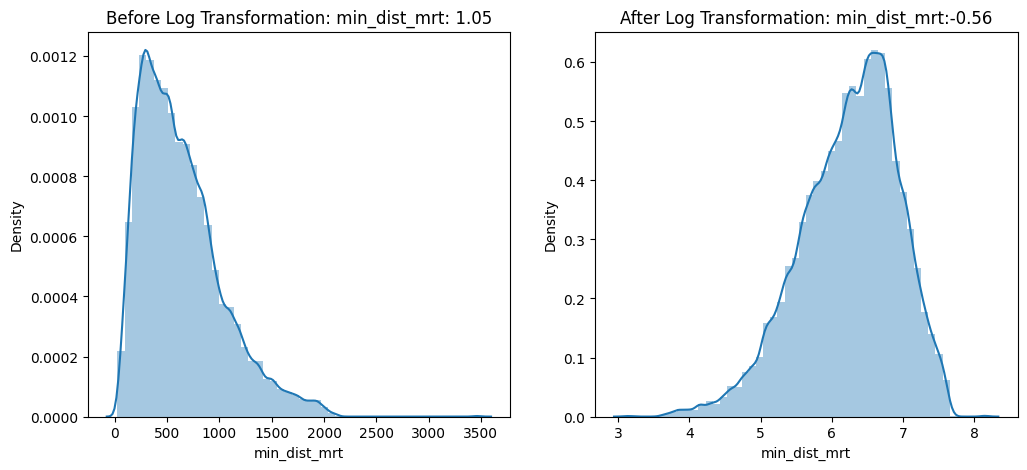

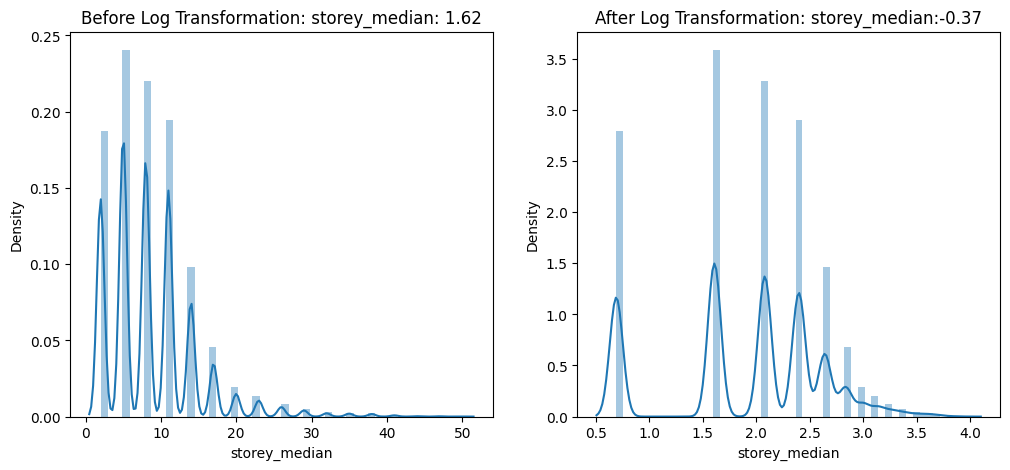

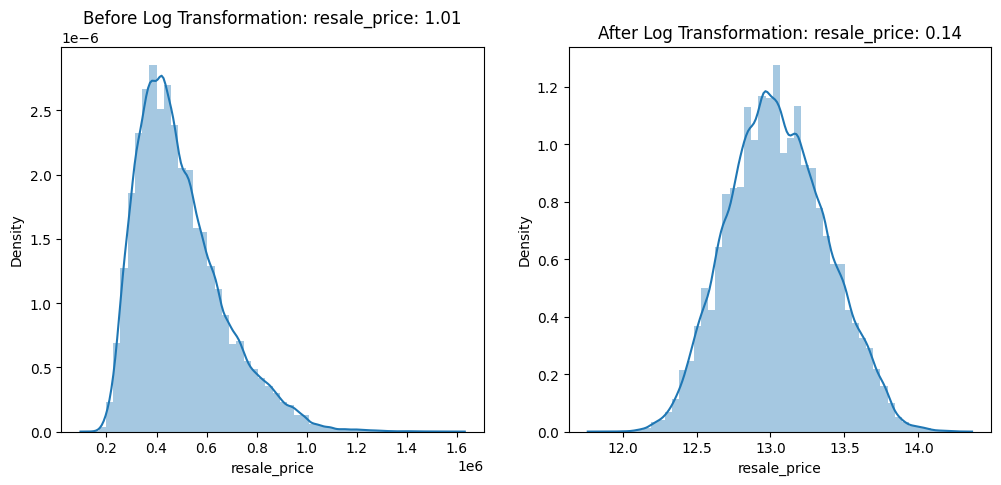

In [14]:
y = ['min_dist_mrt', 'storey_median', 'resale_price']
for i in y:
    fig,axes = plt.subplots(1,2,figsize=(12,5))
    sns.distplot(scope_df[i],ax=axes[0])
    axes[0].set_title(f"Before Log Transformation: {i}:{scope_df[i].skew(): .2f}")
    sns.distplot(df1[i],ax=axes[1])
    axes[1].set_title(f"After Log Transformation: {i}:{df1[i].skew(): .2f}") 
    plt.show()

In [24]:
df2 = df1.copy()

# OUTLIERS

In [10]:
columns = ['cbd_dist', 'min_dist_mrt','floor_area_sqm','lease_remain_years', 'storey_median', 'resale_price']
for i in columns:
    Q1 = df2[i].quantile(0.25)
    Q3 = df2[i].quantile(0.75)
    IQR = Q3-Q1
    print(i,"----",Q1,"---",Q3,"---",IQR)
    outliers = df2[(df2[i]<(Q1-(1.5*IQR))) | (df2[i]>(Q3+(1.5*IQR)))]
    print(outliers.shape)

cbd_dist ---- 9724.338791708831 --- 15476.83524253788 --- 5752.496450829049
(243, 8)
min_dist_mrt ---- 5.791309466382005 --- 6.738984492634829 --- 0.9476750262528242
(2259, 8)
floor_area_sqm ---- 82.0 --- 112.0 --- 30.0
(1261, 8)
lease_remain_years ---- 60.0 --- 80.0 --- 20.0
(0, 8)
storey_median ---- 1.6094379124341003 --- 2.3978952727983707 --- 0.7884573603642704
(817, 8)
resale_price ---- 12.815838217151068 --- 13.279367126213993 --- 0.46352890906292465
(533, 8)


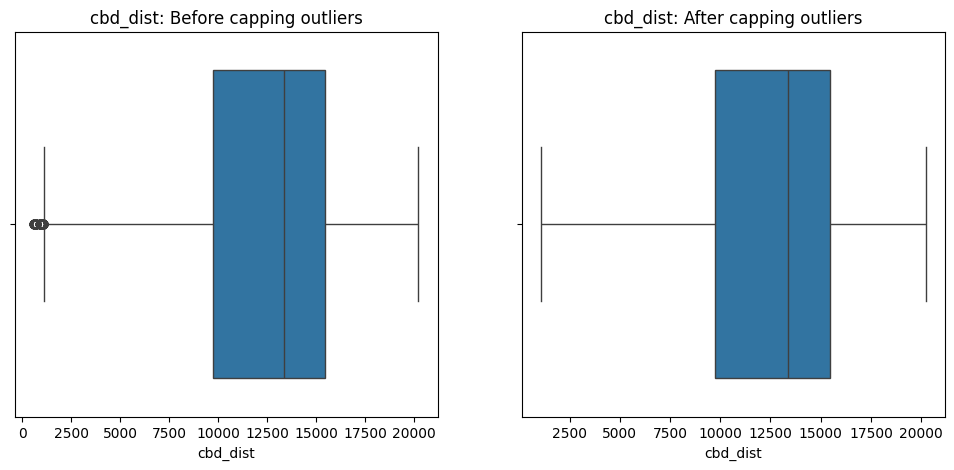

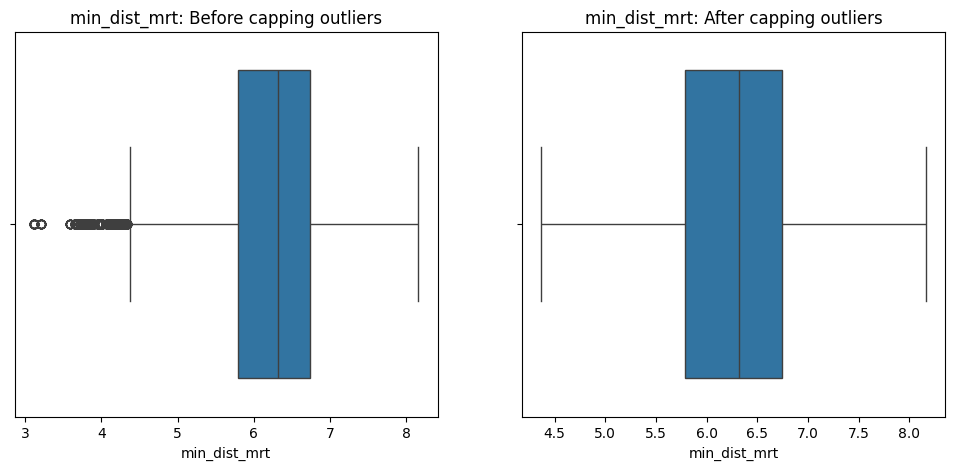

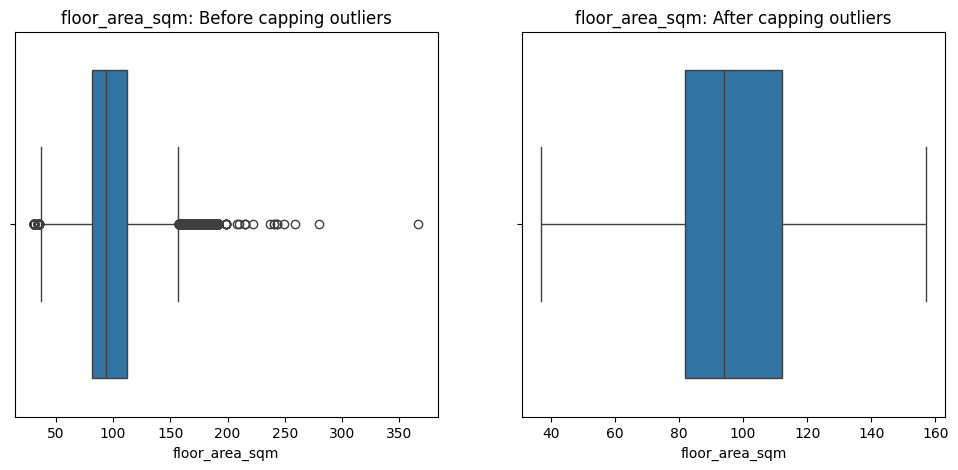

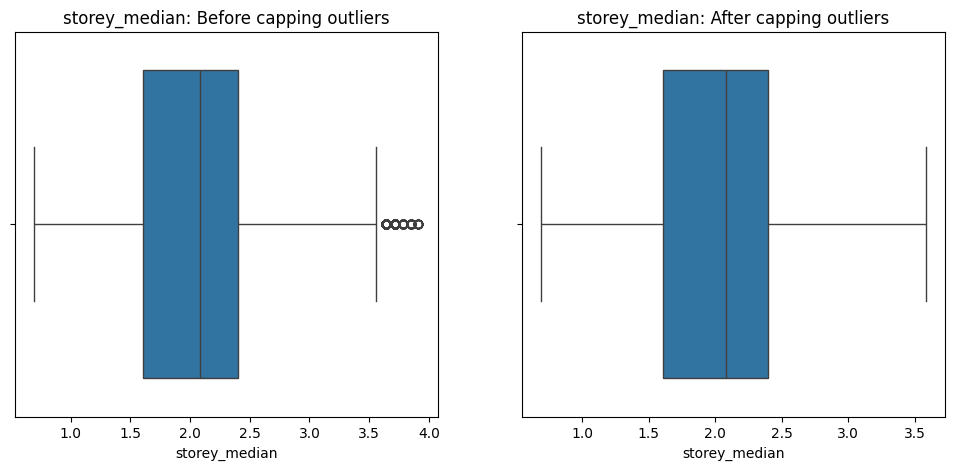

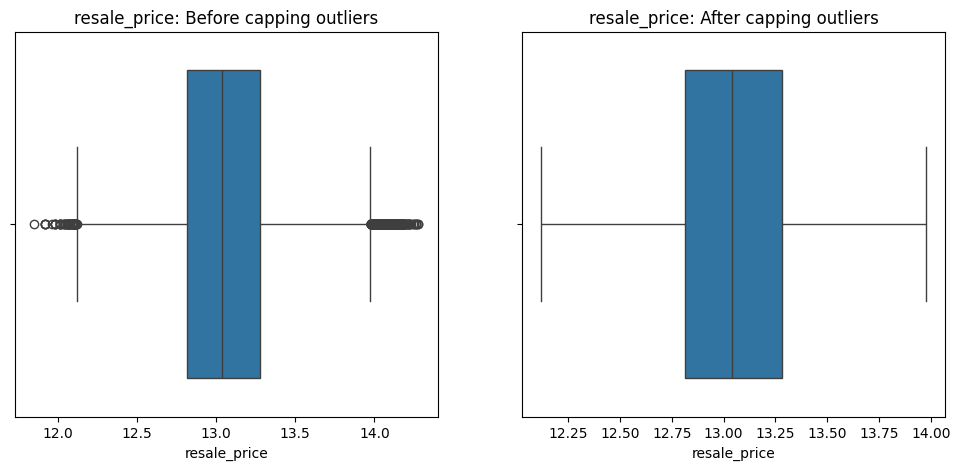

In [11]:
columns = ['cbd_dist', 'min_dist_mrt','floor_area_sqm', 'storey_median', 'resale_price']
for i in columns:
    Q1 = df2[i].quantile(0.25)
    Q3 = df2[i].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    df2[i] = np.where(df2[i]<lower_bound,lower_bound,
                     np.where(df2[i]>upper_bound,upper_bound,df2[i]))
    fig, axes = plt.subplots(1,2,figsize=(12,5))
    sns.boxplot(x=df1[i],ax=axes[0])
    axes[0].set_title(f'{i}: Before capping outliers')
    sns.boxplot(x=df2[i],ax=axes[1])
    axes[1].set_title(f'{i}: After capping outliers')
    plt.show()


In [16]:
df2.columns

Index(['cbd_dist', 'min_dist_mrt', 'flat_type', 'flat_model', 'floor_area_sqm',
       'lease_remain_years', 'storey_median', 'resale_price'],
      dtype='object')

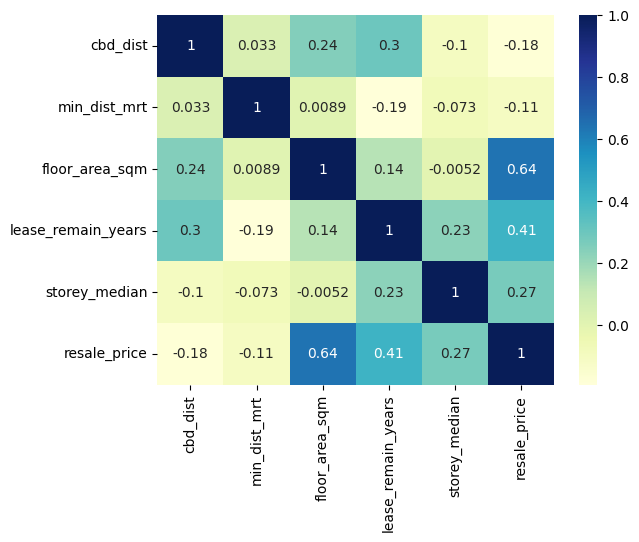

In [17]:
corr_matrix = df2[['cbd_dist', 'min_dist_mrt','floor_area_sqm', 'lease_remain_years', 'storey_median', 'resale_price']].corr()
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.show()

In [29]:
df2["flat_type"].unique()

array(['3 ROOM', '5 ROOM', '4 ROOM', 'EXECUTIVE', '2 ROOM',
       'MULTI-GENERATION', '1 ROOM'], dtype=object)

In [30]:
df2["flat_model"].unique()

array(['Improved', 'Adjoined flat', 'Model A', 'New Generation',
       'Standard', 'Apartment', 'Maisonette', 'Simplified',
       'Model A-Maisonette', '2-room', 'Premium Apartment',
       'Improved-Maisonette', 'Model A2', 'Multi Generation', 'DBSS',
       'Type S1', 'Type S2', '3Gen', 'Premium Apartment Loft', 'Terrace',
       'Premium Maisonette'], dtype=object)

# Linear Regression Model

# LR Model including flat type and flat model

In [87]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score

In [38]:
# splitting dependent and independent variable
x = df2[['cbd_dist', 'min_dist_mrt', 'flat_type', 'flat_model', 'floor_area_sqm','lease_remain_years', 'storey_median']]
y = df2[['resale_price']] 

In [39]:
ohe_flat_type = OneHotEncoder(handle_unknown = "ignore")
ohe_flat_type.fit(x[['flat_type']])
x_flat_type = ohe_flat_type.fit_transform(x[['flat_type']]).toarray()

ohe_flat_model = OneHotEncoder(handle_unknown="ignore")
ohe_flat_model.fit(x[['flat_model']])
x_flat_model = ohe_flat_model.fit_transform(x[['flat_model']]).toarray()

X = np.concatenate((x[['cbd_dist', 'min_dist_mrt','floor_area_sqm','lease_remain_years', 'storey_median']].values,x_flat_type,x_flat_model),axis=1)

In [17]:
print(x_flat_type)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
X_df = pd.DataFrame(X)
print(X_df)

                 0         1      2     3         4    5    6    7    8    9   \
0       2715.822202  6.124885   74.0  54.0  1.609438  0.0  0.0  1.0  0.0  0.0   
1       2715.822202  6.124885   68.0  54.0  2.079442  0.0  0.0  1.0  0.0  0.0   
2       2715.822202  6.124885   68.0  54.0  2.079442  0.0  0.0  1.0  0.0  0.0   
3       2715.822202  6.124885   68.0  54.0  2.079442  0.0  0.0  1.0  0.0  0.0   
4       2715.822202  6.124885   68.0  54.0  2.079442  0.0  0.0  1.0  0.0  0.0   
...             ...       ...    ...   ...       ...  ...  ...  ...  ...  ...   
217495  2525.251132  5.208746  112.0  91.0  3.135494  0.0  0.0  0.0  0.0  1.0   
217496  2525.251132  5.208746  112.0  91.0  2.995732  0.0  0.0  0.0  0.0  1.0   
217497  2525.251132  5.208746   92.0  91.0  3.258097  0.0  0.0  0.0  1.0  0.0   
217498  2525.251132  5.208746  112.0  91.0  3.555348  0.0  0.0  0.0  0.0  1.0   
217499  2525.251132  5.208746   92.0  91.0  2.397895  0.0  0.0  0.0  1.0  0.0   

        ...   23   24   25 

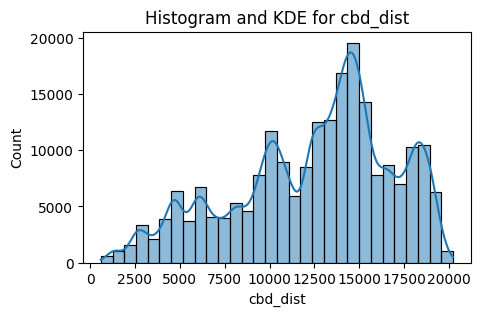

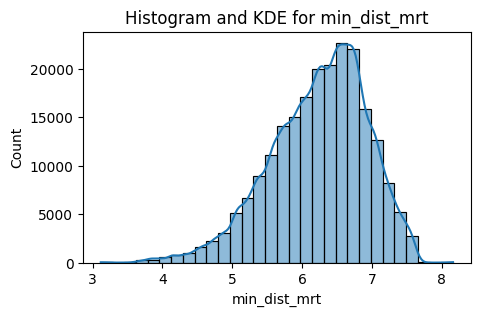

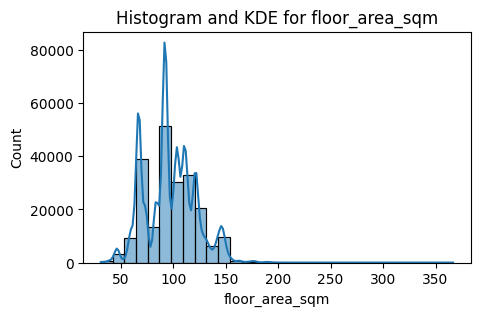

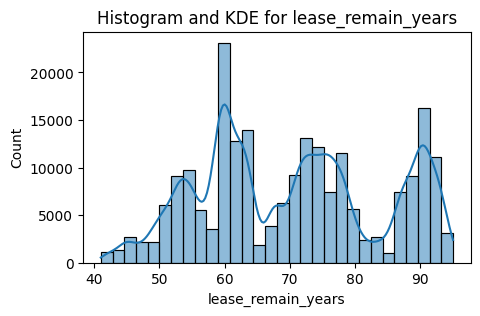

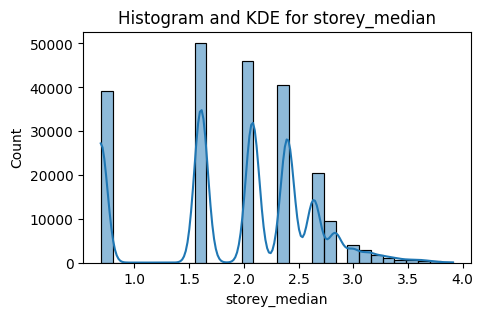

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

continuous_columns = ['cbd_dist', 'min_dist_mrt', 'floor_area_sqm','lease_remain_years', 'storey_median']
# Plot for each continuous feature
for column in continuous_columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(df2[column], bins=30, kde=True)
    plt.title(f'Histogram and KDE for {column}')
    plt.show()



In [40]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
print(X_scaled)

[[0.10817005 0.59640901 0.12809056 ... 0.         0.         0.        ]
 [0.10817005 0.59640901 0.11021746 ... 0.         0.         0.        ]
 [0.10817005 0.59640901 0.11021746 ... 0.         0.         0.        ]
 ...
 [0.09846337 0.41468041 0.18170986 ... 0.         0.         0.        ]
 [0.09846337 0.41468041 0.24128686 ... 0.         0.         0.        ]
 [0.09846337 0.41468041 0.18170986 ... 0.         0.         0.        ]]


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

train_r2 = r2_score(y_train,y_train_predict)
print(f"Training R²: {train_r2}")

test_r2 = r2_score(y_test,y_test_predict)
print(f"Testing R²: {test_r2}")

Training R²: 0.7561266424684278
Testing R²: 0.7556817980428512


# LR model without including flat type and flat model

In [45]:
# splitting dependent and independent variable
x = df2[['cbd_dist', 'min_dist_mrt','floor_area_sqm','lease_remain_years', 'storey_median']]
y = df2[['resale_price']] 

# scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Model
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

train_r2 = r2_score(y_train,y_train_predict)
print(f"Training R²: {train_r2}")

test_r2 = r2_score(y_test,y_test_predict)
print(f"Testing R²: {test_r2}")


Training R²: 0.7561266424684278
Testing R²: 0.7556817980428512


# Decision Tree Regressor

In [50]:
# Splitting dependent and independent variable
X = df2[['cbd_dist', 'min_dist_mrt','floor_area_sqm','lease_remain_years', 'storey_median']]
y = df2[['resale_price']]

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

# Performance metrics
train_r2 = r2_score(y_train, y_train_predict)
print(f"Training R²: {train_r2}")

test_r2 = r2_score(y_test, y_test_predict)
print(f"Testing R²: {test_r2}")

Training R²: 0.9277116270425972
Testing R²: 0.7690478152951983


In [ ]:
# Overfit : Control the model flow by adjusting the below parameters

In [70]:
# Splitting dependent and independent variable
X = df2[['cbd_dist', 'min_dist_mrt', 'floor_area_sqm', 'lease_remain_years', 'storey_median']]
y = df2[['resale_price']]

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Decision Tree Regressor with all hyperparameters
model = DecisionTreeRegressor(
    max_depth=10,            # Limit the depth of the tree
    min_samples_leaf=10,    # Minimum samples required in a leaf node
    min_samples_split=10,   # Minimum samples required to split a node
    random_state=42
)

# Fitting the model
model.fit(X_train, y_train)

# Predictions
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

# Performance metrics
train_r2 = r2_score(y_train, y_train_predict)
print(f"Training R²: {train_r2}")

test_r2 = r2_score(y_test, y_test_predict)
print(f"Testing R²: {test_r2}")

Training R²: 0.8184970579124107
Testing R²: 0.8119531337304703


# Random Forest Regressor

In [73]:
# Splitting dependent and independent variable
X = df2[['cbd_dist', 'min_dist_mrt','floor_area_sqm','lease_remain_years', 'storey_median']]
y = df2[['resale_price']]

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Step 4: Train the model on the training data
rf_model.fit(X_train, y_train)

# Step 5: Predict on training and testing sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Step 6: Calculate R² scores for training and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training R²: {train_r2}")
print(f"Testing R²: {test_r2}")


Training R²: 0.9213233577394672
Testing R²: 0.8170370196322714


In [ ]:
# Overfit : Control the model flow by adjusting the below parameters

In [82]:
# Splitting dependent and independent variable
X = df2[['cbd_dist', 'min_dist_mrt', 'floor_area_sqm', 'lease_remain_years', 'storey_median']]
y = df2[['resale_price']]

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Decision Tree Regressor with all hyperparameters
model = RandomForestRegressor(
    max_depth=13,            # Limit the depth of the tree
    min_samples_leaf=10,    # Minimum samples required in a leaf node
    min_samples_split=10,   # Minimum samples required to split a node
    random_state=42
)

# Fitting the model
model.fit(X_train, y_train)

# Predictions
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

# Performance metrics
train_r2 = r2_score(y_train, y_train_predict)
print(f"Training R²: {train_r2}")

test_r2 = r2_score(y_test, y_test_predict)
print(f"Testing R²: {test_r2}")

Training R²: 0.8528639093415823
Testing R²: 0.8413693115085584


# xgboost

In [122]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assume df2 is your dataframe
X = df2[['cbd_dist', 'min_dist_mrt', 'floor_area_sqm', 'lease_remain_years', 'storey_median']]
y = df2['resale_price']

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the model with default parameters
bst = xgb.train({'objective': 'reg:squarederror', 'eval_metric': 'rmse'}, dtrain, num_boost_round=131, evals=[(dtest, 'test')], early_stopping_rounds=10)

# Make predictions
y_pred = bst.predict(dtest)

# Evaluate the model performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")


[0]	test-rmse:0.26006
[1]	test-rmse:0.21440
[2]	test-rmse:0.18603
[3]	test-rmse:0.17018
[4]	test-rmse:0.16020
[5]	test-rmse:0.15326
[6]	test-rmse:0.14962
[7]	test-rmse:0.14688
[8]	test-rmse:0.14512
[9]	test-rmse:0.14364
[10]	test-rmse:0.14294
[11]	test-rmse:0.14202
[12]	test-rmse:0.14111
[13]	test-rmse:0.14056
[14]	test-rmse:0.14016
[15]	test-rmse:0.14000
[16]	test-rmse:0.13970
[17]	test-rmse:0.13913
[18]	test-rmse:0.13841
[19]	test-rmse:0.13796
[20]	test-rmse:0.13782
[21]	test-rmse:0.13745
[22]	test-rmse:0.13731
[23]	test-rmse:0.13678
[24]	test-rmse:0.13662
[25]	test-rmse:0.13614
[26]	test-rmse:0.13567
[27]	test-rmse:0.13538
[28]	test-rmse:0.13521
[29]	test-rmse:0.13501
[30]	test-rmse:0.13473
[31]	test-rmse:0.13452
[32]	test-rmse:0.13439
[33]	test-rmse:0.13413
[34]	test-rmse:0.13400
[35]	test-rmse:0.13369
[36]	test-rmse:0.13359
[37]	test-rmse:0.13352
[38]	test-rmse:0.13342
[39]	test-rmse:0.13332
[40]	test-rmse:0.13320
[41]	test-rmse:0.13298
[42]	test-rmse:0.13281
[43]	test-rmse:0.1326

In [124]:
# evaluating r2 score
y_train_pred = bst.predict(dtrain)
y_test_pred = bst.predict(dtest)

# Calculate R² score for train and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Training R²: {train_r2}")
print(f"Testing R²: {test_r2}")


Training R²: 0.8594831320010633
Testing R²: 0.850018646281195


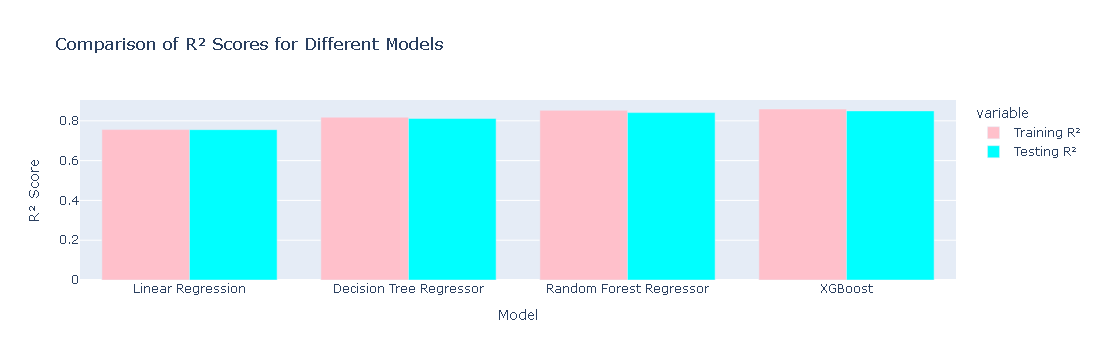

In [146]:
import plotly.express as px
import pandas as pd

# Data for the models
data = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost'],
    'Training R²': [0.7561, 0.8185, 0.8529, 0.8595],
    'Testing R²': [0.7557, 0.8120, 0.8414, 0.8500]
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Create the grouped bar chart
fig = px.bar(
    df,
    x='Model',
    y=['Training R²', 'Testing R²'],
    title='Comparison of R² Scores for Different Models',
    labels={'value': 'R² Score', 'Model': 'Model'},
    color_discrete_map={'Training R²': 'pink', 'Testing R²': 'cyan'},
    barmode='group'
)

# Show the plot
fig.show()


In [147]:
# Saving the model
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(bst, model_file)
